In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data =pd.read_csv("../marketing-analysis/Marketing_Analysis.csv",skiprows=2)
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [2]:
data.drop('customerid',axis=1)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
5,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no
6,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no
7,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no
8,58.0,55000,121,married,"retired,primary",yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no
9,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",55 sec,1,-1,0,unknown,no


In [3]:
data['job']= data['jobedu'].apply(lambda x:x.split(',')[0])
data['edjucation']=data['jobedu'].apply(lambda x:x.split(",")[1])
data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,edjucation
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
5,6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary
6,7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,...,5,"may, 2017",217 sec,1,-1,0,unknown,no,management,tertiary
7,8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,...,5,"may, 2017",380 sec,1,-1,0,unknown,no,entrepreneur,tertiary
8,9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,...,5,"may, 2017",50 sec,1,-1,0,unknown,no,retired,primary
9,10,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",55 sec,1,-1,0,unknown,no,technician,secondary


In [4]:
data.drop('jobedu',axis=1)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edjucation
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
5,6,35.0,100000,231,married,yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary
6,7,28.0,100000,447,single,no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no,management,tertiary
7,8,42.0,120000,2,divorced,no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no,entrepreneur,tertiary
8,9,58.0,55000,121,married,yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no,retired,primary
9,10,43.0,60000,593,single,yes,no,yes,no,unknown,5,"may, 2017",55 sec,1,-1,0,unknown,no,technician,secondary


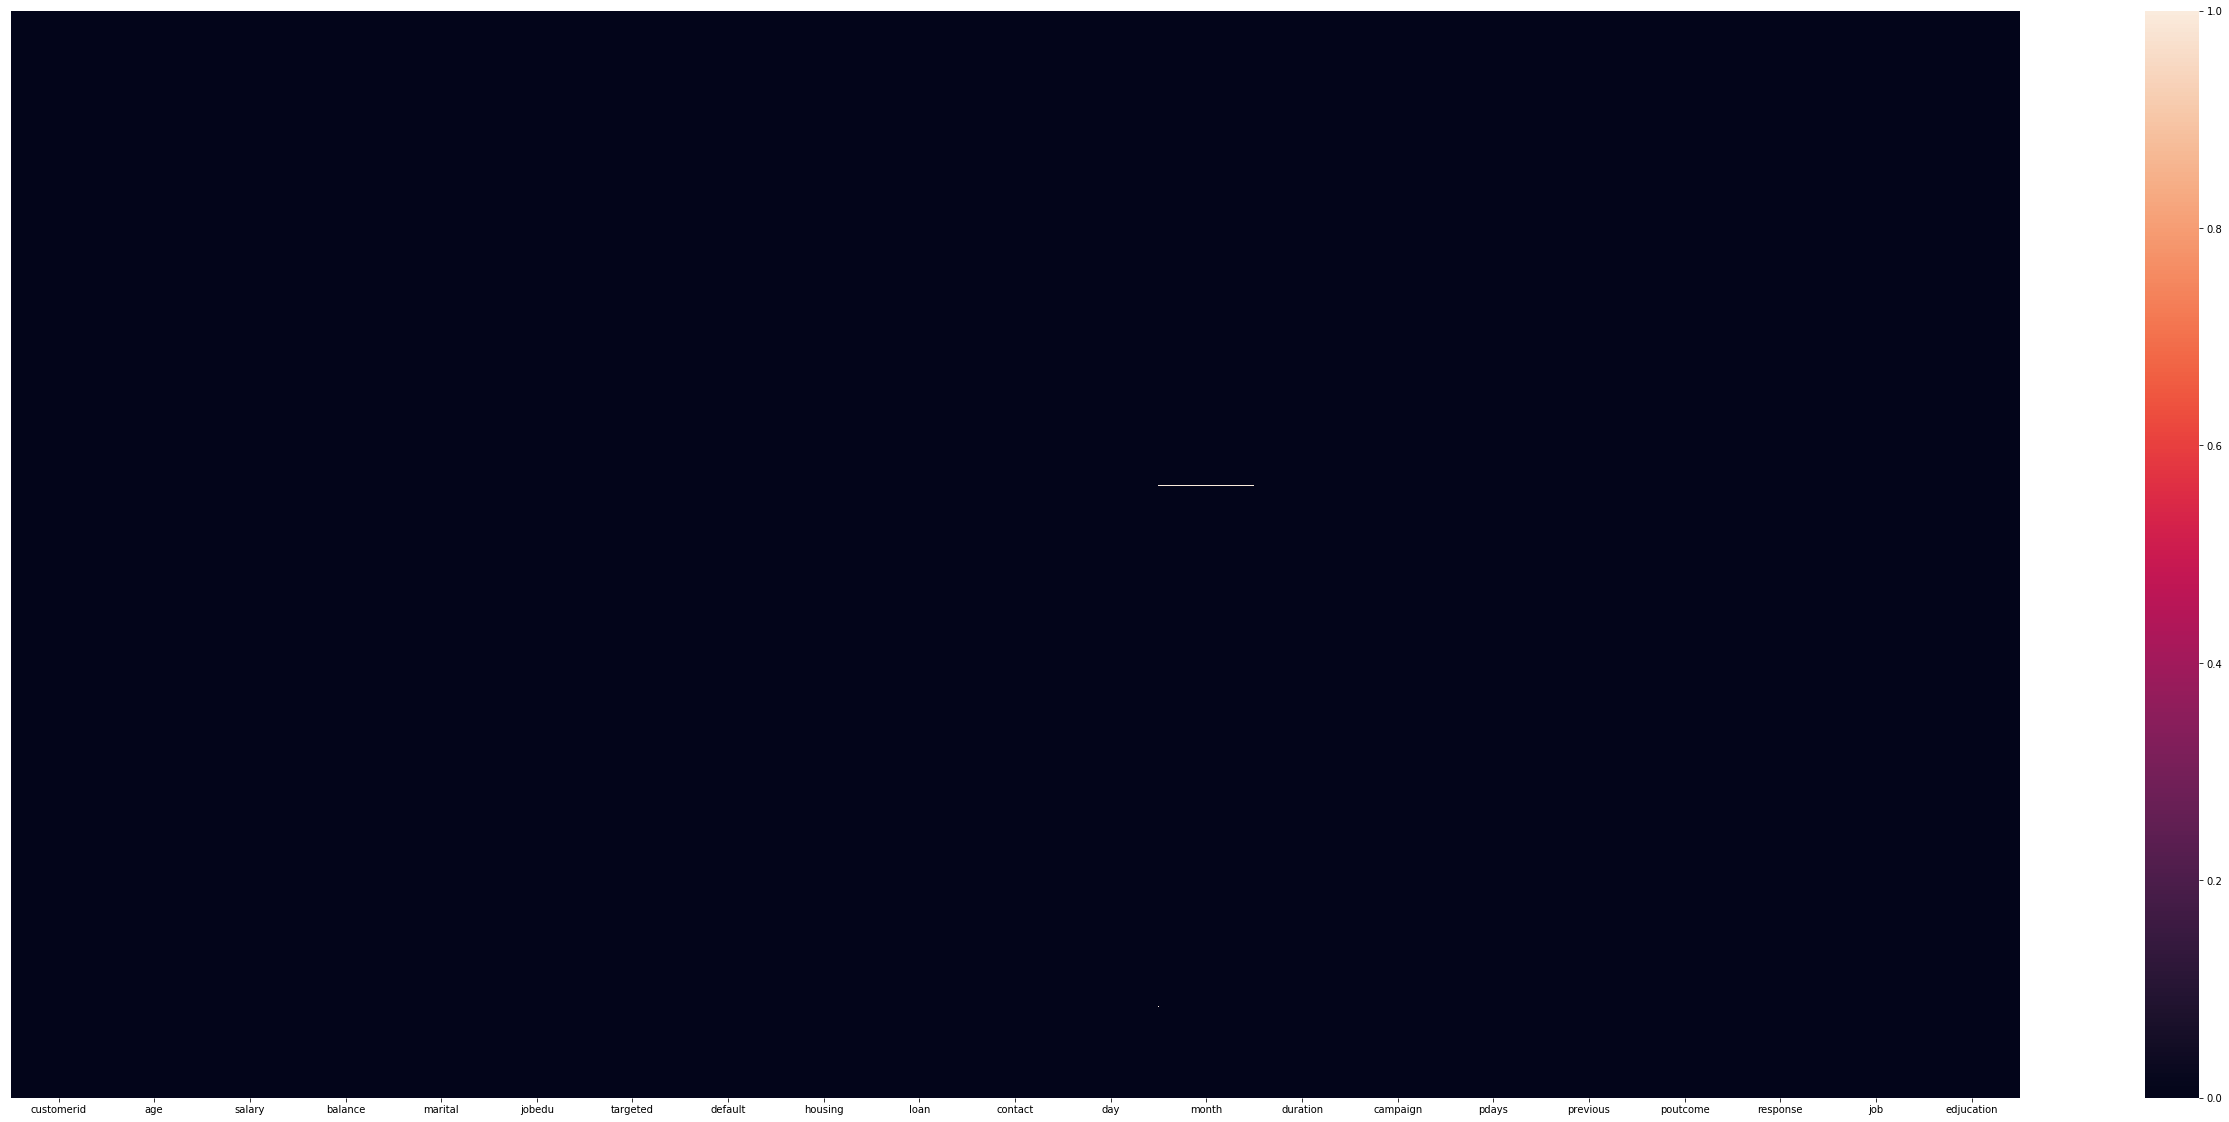

In [5]:
plt.figure(figsize=(45,20))
sns.heatmap(data.isnull(),yticklabels=False)

In [6]:
#data.isnull().sum()

In [7]:

data=data[~data.age.isnull()]
data.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job            0
edjucation     0
dtype: int64

In [8]:
data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,edjucation
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
5,6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary
6,7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,...,5,"may, 2017",217 sec,1,-1,0,unknown,no,management,tertiary
7,8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,...,5,"may, 2017",380 sec,1,-1,0,unknown,no,entrepreneur,tertiary
8,9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,...,5,"may, 2017",50 sec,1,-1,0,unknown,no,retired,primary
9,10,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",55 sec,1,-1,0,unknown,no,technician,secondary


In [9]:
month_mode=data.month.mode()[0]
month_mode

'may, 2017'

In [10]:
data.month.fillna(month_mode,inplace=True)

C:\Users\dhvan\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:
data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,edjucation
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
5,6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary
6,7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,...,5,"may, 2017",217 sec,1,-1,0,unknown,no,management,tertiary
7,8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,...,5,"may, 2017",380 sec,1,-1,0,unknown,no,entrepreneur,tertiary
8,9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,...,5,"may, 2017",50 sec,1,-1,0,unknown,no,retired,primary
9,10,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",55 sec,1,-1,0,unknown,no,technician,secondary


In [12]:
data = data[~data.response.isnull()].copy()
data.isnull().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
job           0
edjucation    0
dtype: int64

In [13]:
data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,edjucation
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
5,6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary
6,7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,...,5,"may, 2017",217 sec,1,-1,0,unknown,no,management,tertiary
7,8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,...,5,"may, 2017",380 sec,1,-1,0,unknown,no,entrepreneur,tertiary
8,9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,...,5,"may, 2017",50 sec,1,-1,0,unknown,no,retired,primary
9,10,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",55 sec,1,-1,0,unknown,no,technician,secondary


In [14]:
data.job.value_counts()

blue-collar      9722
management       9451
technician       7589
admin.           5165
services         4148
retired          2262
self-employed    1574
entrepreneur     1484
unemployed       1302
housemaid        1238
student           938
unknown           288
Name: job, dtype: int64

In [15]:
data.job.value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

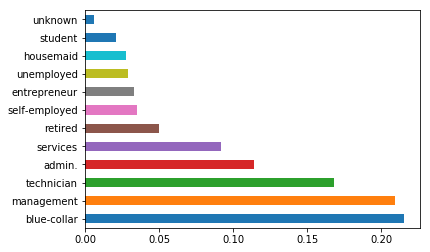

In [16]:
data.job.value_counts(normalize=True).plot.barh()

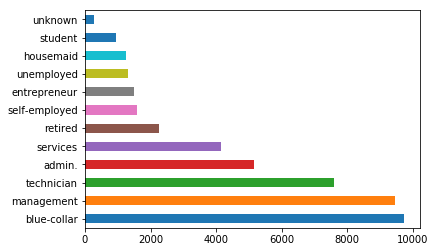

In [17]:
data.job.value_counts().plot.barh()

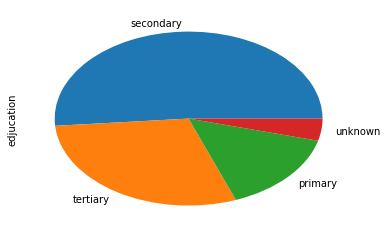

In [18]:
data.edjucation.value_counts(normalize=True).plot.pie()

In [19]:
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

In [20]:
data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,edjucation
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
5,6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary
6,7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,...,5,"may, 2017",217 sec,1,-1,0,unknown,no,management,tertiary
7,8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,...,5,"may, 2017",380 sec,1,-1,0,unknown,no,entrepreneur,tertiary
8,9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,...,5,"may, 2017",50 sec,1,-1,0,unknown,no,retired,primary
9,10,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",55 sec,1,-1,0,unknown,no,technician,secondary


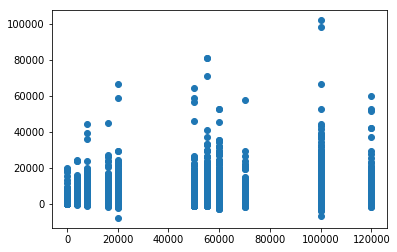

In [21]:
plt.scatter(data.salary,data.balance)

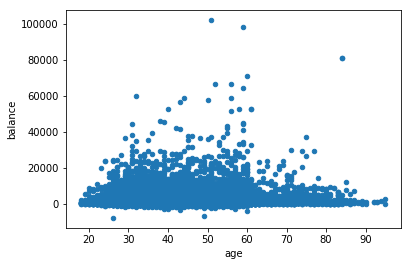

In [22]:
data.plot.scatter(x="age",y="balance")

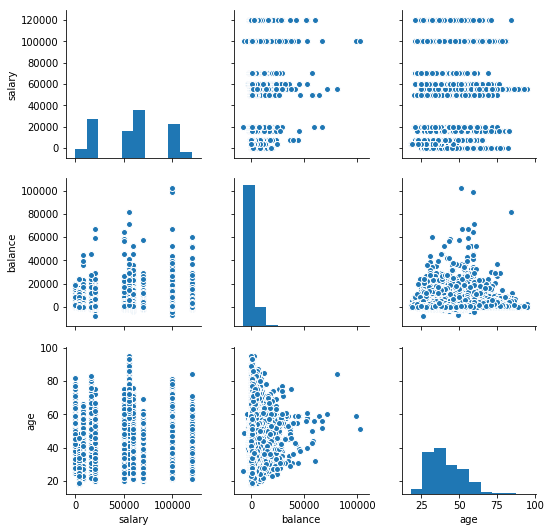

In [23]:
sns.pairplot(data=data,vars=['salary','balance','age'])

In [24]:
data[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


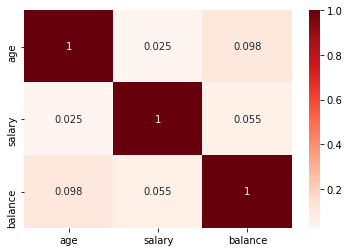

In [25]:
sns.heatmap(data[['age','salary','balance']].corr(),annot=True,cmap="Reds")

In [26]:
data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,edjucation
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
5,6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary
6,7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,...,5,"may, 2017",217 sec,1,-1,0,unknown,no,management,tertiary
7,8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,...,5,"may, 2017",380 sec,1,-1,0,unknown,no,entrepreneur,tertiary
8,9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,...,5,"may, 2017",50 sec,1,-1,0,unknown,no,retired,primary
9,10,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",55 sec,1,-1,0,unknown,no,technician,secondary


In [27]:
data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [28]:
data.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

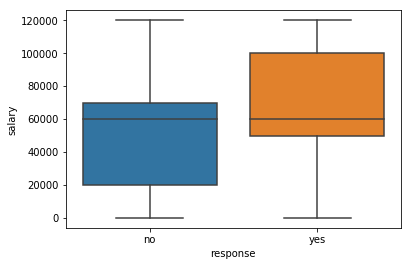

In [29]:
sns.boxplot(data.response,data.salary)

In [30]:
data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,edjucation
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
5,6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary
6,7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,...,5,"may, 2017",217 sec,1,-1,0,unknown,no,management,tertiary
7,8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,...,5,"may, 2017",380 sec,1,-1,0,unknown,no,entrepreneur,tertiary
8,9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,...,5,"may, 2017",50 sec,1,-1,0,unknown,no,retired,primary
9,10,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",55 sec,1,-1,0,unknown,no,technician,secondary


In [31]:
data['response_rate']=np.where(data.response=='yes',1,0)
data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,month,duration,campaign,pdays,previous,poutcome,response,job,edjucation,response_rate
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary,0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary,0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary,0
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown,0
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown,0
5,6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,...,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary,0
6,7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,...,"may, 2017",217 sec,1,-1,0,unknown,no,management,tertiary,0
7,8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,...,"may, 2017",380 sec,1,-1,0,unknown,no,entrepreneur,tertiary,0
8,9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,...,"may, 2017",50 sec,1,-1,0,unknown,no,retired,primary,0
9,10,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,...,"may, 2017",55 sec,1,-1,0,unknown,no,technician,secondary,0


In [32]:
data.response_rate.value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

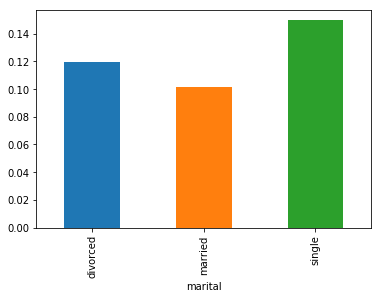

In [33]:
data.groupby('marital')['response_rate'].mean().plot.bar()

In [34]:
result = pd.pivot_table(data=data, index='edjucation', columns='marital',values='response_rate')
print(result)

marital     divorced   married    single
edjucation                              
primary     0.138852  0.075601  0.106808
secondary   0.103559  0.094650  0.129271
tertiary    0.137415  0.129835  0.183737
unknown     0.142012  0.122519  0.162879


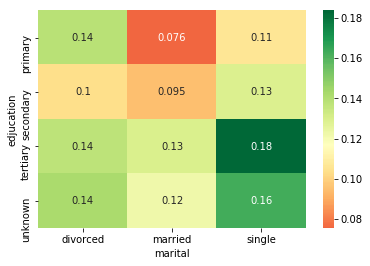

In [35]:
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)